In [1]:
# Import all libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils
from keras.models import model_from_json
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Disable warning message of tensorflow
import cv2
from numpy import *
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from skimage.measure import compare_ssim
from skimage.util.shape import view_as_windows
import math

Using TensorFlow backend.


In [2]:
# Load X data
path1 = './Input/'
X_data = os.listdir(path1)
X_data = sorted(X_data)

X = []
window_shape = (32, 32)
for img in X_data:
    im = cv2.imread(path1 + img,0)
    patches = view_as_windows(im, window_shape, step=16)
    patches = patches.reshape(patches.shape[0]*patches.shape[1],32,32)
    for i in range(0,len(patches)):
        X.append(patches[i])
        
X = np.array(X)
print(len(X))

396900


In [3]:
# Load Y data
path2 = './Label/'
Y_data = os.listdir(path2)
Y_data = sorted(Y_data)

Y = []
window_shape = (32, 32)
for img2 in Y_data:
    im2 = cv2.imread(path2 + img2,0)
    patches = view_as_windows(im2, window_shape, step=16)
    patches = patches.reshape(patches.shape[0]*patches.shape[1],32,32)
    for i in range(0,len(patches)):
        Y.append(patches[i])

Y = np.array(Y)
print(len(Y))

396900


In [4]:
# Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 4)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)
Y_train = Y_train.reshape(Y_train.shape[0], 32, 32, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 32, 32, 1)

X_train = X_train.astype('int') 
X_test = X_test.astype('int')
Y_train = Y_train.astype('int') 
Y_test = Y_test.astype('int')

# Normalization of data 
# Data pixels are between 0 and 1
# X_train /= 255
# X_test /= 255
# Y_train /= 255
# Y_test /= 255

print(np.shape(X_train),np.shape(X_test),np.shape(Y_train),np.shape(Y_test))

(317520, 32, 32, 1) (79380, 32, 32, 1) (317520, 32, 32, 1) (79380, 32, 32, 1)


In [5]:
model = Sequential()
model.add(Conv2D(128, (9, 9), activation='relu', padding='same', input_shape=(32, 32, 1)))
model.add(Conv2D(64, (1, 1), activation='relu', padding='same'))
model.add(Conv2D(1, (5, 5), activation='linear', padding='same'))

opt = Adam(lr = 0.01)

model.compile(loss='mean_absolute_error', optimizer = opt) 
model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       10496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 1)         1601      
Total params: 20,353
Trainable params: 20,353
Non-trainable params: 0
_________________________________________________________________


In [6]:
reduce_lr = ReduceLROnPlateau(monitor='loss', patience=10, factor=0.1, min_lr=0.00001)
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks = [EarlyStopping(monitor='loss', patience=20, verbose=1), reduce_lr, checkpoint]

results = model.fit(X_train, Y_train, batch_size=512, epochs=250, validation_split = 0.2, shuffle = True, callbacks = callbacks)


Train on 254016 samples, validate on 63504 samples
Epoch 1/250
254016/254016 [==============================] - 24s - loss: 11.8993 - val_loss: 6.1865
Epoch 2/250
254016/254016 [==============================] - 21s - loss: 5.9716 - val_loss: 6.2259
Epoch 3/250
254016/254016 [==============================] - 21s - loss: 5.9992 - val_loss: 5.0646
Epoch 4/250
254016/254016 [==============================] - 22s - loss: 5.4107 - val_loss: 5.4576
Epoch 5/250
254016/254016 [==============================] - 22s - loss: 5.5620 - val_loss: 5.0239
Epoch 6/250
254016/254016 [==============================] - 22s - loss: 5.4634 - val_loss: 5.0554
Epoch 7/250
254016/254016 [==============================] - 22s - loss: 5.7398 - val_loss: 4.9945
Epoch 8/250
254016/254016 [==============================] - 22s - loss: 5.2587 - val_loss: 5.4582
Epoch 9/250
254016/254016 [==============================] - 21s - loss: 5.2474 - val_loss: 4.9131
Epoch 10/250
254016/254016 [=============================

254016/254016 [==============================] - 22s - loss: 4.9480 - val_loss: 5.2442
Epoch 39/250
254016/254016 [==============================] - 22s - loss: 4.9006 - val_loss: 5.1046
Epoch 40/250
254016/254016 [==============================] - 22s - loss: 4.6888 - val_loss: 4.7206
Epoch 41/250
254016/254016 [==============================] - 22s - loss: 4.6807 - val_loss: 4.7152
Epoch 42/250
254016/254016 [==============================] - 22s - loss: 4.6785 - val_loss: 4.7110
Epoch 43/250
254016/254016 [==============================] - 22s - loss: 4.6764 - val_loss: 4.7077
Epoch 44/250
254016/254016 [==============================] - 22s - loss: 4.6744 - val_loss: 4.7144
Epoch 45/250
254016/254016 [==============================] - 22s - loss: 4.6741 - val_loss: 4.7059
Epoch 46/250
254016/254016 [==============================] - 22s - loss: 4.6731 - val_loss: 4.6999
Epoch 47/250
254016/254016 [==============================] - 22s - loss: 4.6682 - val_loss: 4.6983
Epoch 48/250


254016/254016 [==============================] - 22s - loss: 4.5777 - val_loss: 4.6286
Epoch 71/250
254016/254016 [==============================] - 22s - loss: 4.5767 - val_loss: 4.5988
Epoch 72/250
254016/254016 [==============================] - 22s - loss: 4.5750 - val_loss: 4.6056
Epoch 73/250
254016/254016 [==============================] - 22s - loss: 4.5686 - val_loss: 4.5934
Epoch 74/250
254016/254016 [==============================] - 22s - loss: 4.5674 - val_loss: 4.6347
Epoch 75/250
254016/254016 [==============================] - 22s - loss: 4.5690 - val_loss: 4.6266
Epoch 76/250
254016/254016 [==============================] - 22s - loss: 4.5673 - val_loss: 4.5907
Epoch 77/250
254016/254016 [==============================] - 22s - loss: 4.5649 - val_loss: 4.6088
Epoch 78/250
254016/254016 [==============================] - 22s - loss: 4.5642 - val_loss: 4.5899
Epoch 79/250
254016/254016 [==============================] - 22s - loss: 4.5630 - val_loss: 4.6362
Epoch 80/250


254016/254016 [==============================] - 21s - loss: 4.5349 - val_loss: 4.5624
Epoch 105/250
254016/254016 [==============================] - 21s - loss: 4.5324 - val_loss: 4.5706
Epoch 106/250
254016/254016 [==============================] - 22s - loss: 4.5353 - val_loss: 4.5578
Epoch 107/250
254016/254016 [==============================] - 22s - loss: 4.5331 - val_loss: 4.5737
Epoch 108/250
254016/254016 [==============================] - 21s - loss: 4.5331 - val_loss: 4.5814
Epoch 109/250
254016/254016 [==============================] - 21s - loss: 4.5278 - val_loss: 4.5573
Epoch 110/250
254016/254016 [==============================] - 22s - loss: 4.5271 - val_loss: 4.5589
Epoch 111/250
254016/254016 [==============================] - 21s - loss: 4.5294 - val_loss: 4.5580
Epoch 112/250
254016/254016 [==============================] - 22s - loss: 4.5251 - val_loss: 4.5534
Epoch 113/250
254016/254016 [==============================] - 22s - loss: 4.5289 - val_loss: 4.5533
Epoc

254016/254016 [==============================] - 22s - loss: 4.5066 - val_loss: 4.5355
Epoch 140/250
254016/254016 [==============================] - 22s - loss: 4.5094 - val_loss: 4.5340
Epoch 141/250
254016/254016 [==============================] - 21s - loss: 4.5051 - val_loss: 4.5315
Epoch 142/250
254016/254016 [==============================] - 21s - loss: 4.5071 - val_loss: 4.5535
Epoch 143/250
254016/254016 [==============================] - 22s - loss: 4.5082 - val_loss: 4.5425
Epoch 144/250
254016/254016 [==============================] - 21s - loss: 4.5032 - val_loss: 4.6919
Epoch 145/250
254016/254016 [==============================] - 22s - loss: 4.5074 - val_loss: 4.5360
Epoch 146/250
254016/254016 [==============================] - 21s - loss: 4.5026 - val_loss: 4.5310
Epoch 147/250
254016/254016 [==============================] - 22s - loss: 4.5062 - val_loss: 4.5477
Epoch 148/250
254016/254016 [==============================] - 22s - loss: 4.5047 - val_loss: 4.5365
Epoc

254016/254016 [==============================] - 22s - loss: 4.4911 - val_loss: 4.5361
Epoch 177/250
254016/254016 [==============================] - 22s - loss: 4.4920 - val_loss: 4.5188
Epoch 178/250
254016/254016 [==============================] - 22s - loss: 4.4947 - val_loss: 4.5736
Epoch 179/250
254016/254016 [==============================] - 21s - loss: 4.4935 - val_loss: 4.5165
Epoch 180/250
254016/254016 [==============================] - 21s - loss: 4.4923 - val_loss: 4.5263
Epoch 181/250
254016/254016 [==============================] - 22s - loss: 4.4888 - val_loss: 4.5495
Epoch 182/250
254016/254016 [==============================] - 21s - loss: 4.4898 - val_loss: 4.5584
Epoch 183/250
254016/254016 [==============================] - 21s - loss: 4.4927 - val_loss: 4.5189
Epoch 184/250
254016/254016 [==============================] - 22s - loss: 4.4901 - val_loss: 4.5238
Epoch 185/250
254016/254016 [==============================] - 21s - loss: 4.4923 - val_loss: 4.5216
Epoc

254016/254016 [==============================] - 22s - loss: 4.4867 - val_loss: 4.5333
Epoch 215/250
254016/254016 [==============================] - 21s - loss: 4.4832 - val_loss: 4.5125
Epoch 216/250
254016/254016 [==============================] - 22s - loss: 4.4864 - val_loss: 4.5159
Epoch 217/250
254016/254016 [==============================] - 22s - loss: 4.4858 - val_loss: 4.5178
Epoch 218/250
254016/254016 [==============================] - 21s - loss: 4.4881 - val_loss: 4.5150
Epoch 219/250
254016/254016 [==============================] - 21s - loss: 4.4831 - val_loss: 4.5175
Epoch 220/250
254016/254016 [==============================] - 21s - loss: 4.4861 - val_loss: 4.5117
Epoch 221/250
254016/254016 [==============================] - 22s - loss: 4.4848 - val_loss: 4.5224
Epoch 222/250
254016/254016 [==============================] - 21s - loss: 4.4856 - val_loss: 4.5176
Epoch 223/250
254016/254016 [==============================] - 22s - loss: 4.4880 - val_loss: 4.5239
Epoc

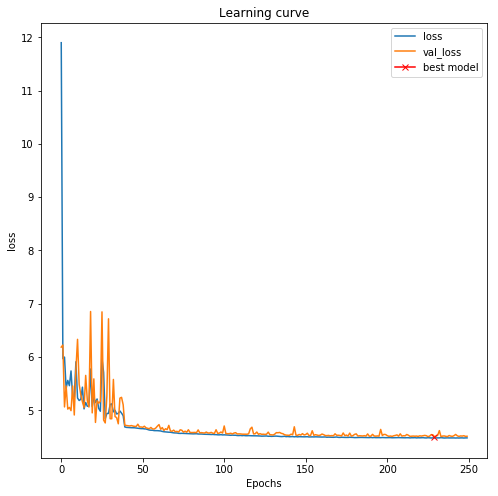

In [7]:
train_loss = results.history['loss']
val_loss = results.history['val_loss'] 
# train_acc = results.history['acc']
# val_acc = results.history['val_acc']

plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

In [9]:
score = model.evaluate(X_test, Y_test, verbose=0) # accuracy check
print(score.shape)
print('Test loss:', score[0]) # Prints test loss

()


IndexError: invalid index to scalar variable.

In [10]:
# Save model and weights
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to H5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [11]:
# Load model and weights
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights("weights.best.hdf5")
# loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


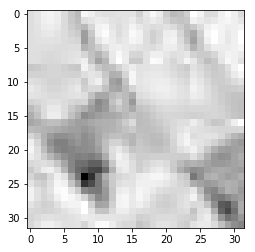

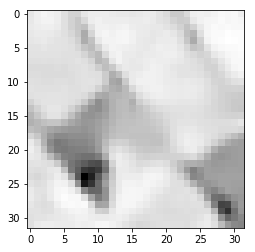

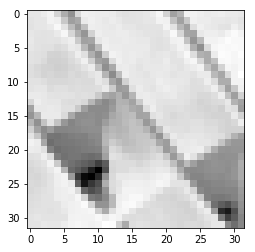

In [20]:
k = 25
test_img = X_test[k].reshape(1, 32, 32, 1)
pred_img = model.predict(test_img)
pred_img = pred_img.reshape(32,32)
pred_img = pred_img.astype('int') 

plt.imshow(X_test[k].reshape(32,32), cmap='gray')
plt.figure()
plt.imshow(pred_img, cmap='gray')
plt.figure()
plt.imshow(Y_test[k].reshape(32,32), cmap='gray')

Y_test_img = Y_test[k].reshape(32,32)
X_test_img = X_test[k].reshape(32,32)

In [13]:
# Compute MSE
print('MSE (Y, X): ', mean_squared_error(Y_test_img, X_test_img))
print('MSE (Y , Predict): ', mean_squared_error(Y_test_img, pred_img))

# Compute MAE
print('\nMAE (Y, X): ', mean_absolute_error(Y_test_img, X_test_img))
print('MAE (Y , Predict): ', mean_absolute_error(Y_test_img, pred_img))

# Compute SSIM
(score1, diff1) = compare_ssim(Y_test_img, X_test_img, full=True)
print('\nSSIM (Y, X): ', score1)
(score2, diff2) = compare_ssim(Y_test_img, pred_img, full=True)
print('SSIM (Y, Predict): ', score2)

MSE (Y, X):  66.3505859375
MSE (Y , Predict):  48.20703125

MAE (Y, X):  6.2470703125
MAE (Y , Predict):  4.884765625

SSIM (Y, X):  1.0
SSIM (Y, Predict):  1.0


In [14]:
# Compute PSNR
def psnr(img1, img2):
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

psnr_X_test = psnr(Y_test_img, X_test_img)
print('\nPSNR (Y, X): ', psnr_X_test)
psnr_predict = psnr(Y_test_img, pred_img)
print('PSNR (Y, X): ', psnr_predict)


PSNR (Y, X):  29.912355984255665
PSNR (Y, X):  31.29969973866181


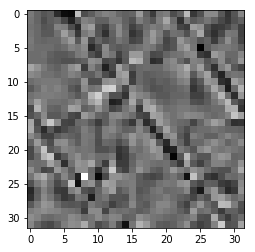

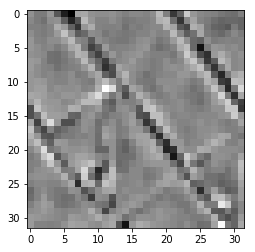

In [15]:
err_X_img = Y_test_img - X_test_img
plt.imshow(err_X_img, cmap='gray')

err_pred_img = Y_test_img - pred_img
plt.figure()
plt.imshow(err_pred_img, cmap='gray')